In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import scipy.stats as stats
import statistics

In [3]:
# read in data
auto_claims = pd.read_csv('sweden_insurance.csv')
auto_claims.head()

,claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Text(0, 0.5, 'Price per Area Unit')

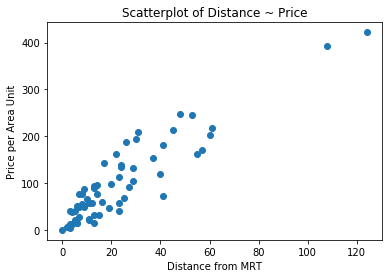

In [4]:
# lets make a graphing of just the points
X = auto_claims['claims']
y = auto_claims['total_payment']

plt.scatter(X, y)
plt.title('Scatterplot of Distance ~ Price')
plt.xlabel('Distance from MRT')
plt.ylabel('Price per Area Unit')

Text(0, 0.5, 'Price per Area Unit')

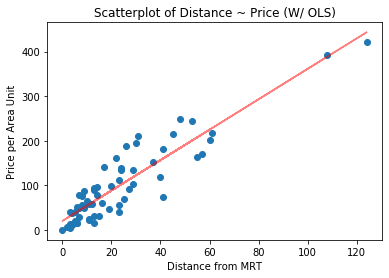

In [9]:
# now lets add a line that fits the data
m, b = np. polyfit(X, y, 1)
plt.scatter(X, y)
plt.plot(X, m*X + b, color = 'red', alpha = 0.5)

plt.title('Scatterplot of Distance ~ Price (W/ OLS)')
plt.xlabel('Distance from MRT')
plt.ylabel('Price per Area Unit')

In [11]:
# now we are going to create an OLS regression and feed this regression into LR
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import statsmodels.stats.diagnostic as stats_test

X = auto_claims['claims']
y = auto_claims['total_payment']
X = add_constant(X)
regression = OLS(y, X).fit()
stats_test.linear_rainbow(regression)

(2.1624937123923194, 0.019408207593609034)

In [17]:
# creating a Pearson Correlation Coefficient 
from scipy.stats import pearsonr
X = auto_claims['claims']
y = auto_claims['total_payment']
pearsonr(X, y)

(0.9128782350234067, 2.046637844952289e-25)

In [26]:
# lets find VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
                for i in range(X.shape[1])], 
                index = X.columns)

const     1.977584
claims    1.000000
dtype: float64

In [27]:
# durbin-watson test
from statsmodels.stats.stattools import durbin_watson
X = auto_claims['claims']
y = auto_claims['total_payment']
X = add_constant(X)
regression = OLS(y, X).fit()

durbin_watson(regression.resid)

1.1993321891675772

[ 1.00000000e+00  1.08402854e-01  1.52044962e-01  3.84696053e-01
  1.02327585e-02  2.50748661e-01 -7.47346170e-03 -9.20852359e-02
  2.04201246e-01 -7.86984108e-02 -9.02635004e-02  3.36267211e-02
 -1.11878182e-01 -5.06022217e-02 -8.94110500e-02 -1.47650919e-01
  6.85065645e-03 -7.69118196e-02 -1.20127703e-01 -3.47713924e-02
 -9.13778563e-03 -6.53382122e-02 -1.46711949e-01 -8.75782480e-02
 -7.47249590e-02 -3.28955320e-02 -1.38589056e-01 -1.52662603e-01
 -9.76528572e-04 -1.46746222e-01 -1.04730879e-01  5.37988772e-02
 -7.69454213e-02  8.36251853e-02 -3.80120454e-02 -1.16197041e-01
  1.40163976e-01  1.13295423e-02  6.35209703e-02  8.19841344e-02
  4.00302268e-02]


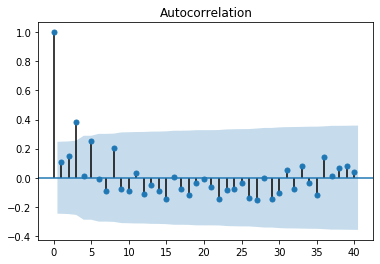

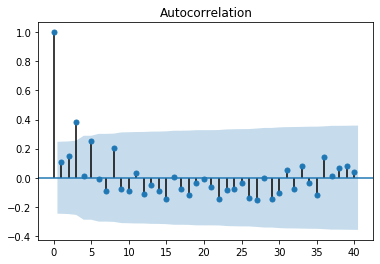

In [34]:
# acf test
from statsmodels.tsa.stattools import acf
X = auto_claims['claims']
y = auto_claims['total_payment']
print(acf(X))

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(X, lags = 40)

Text(0, 0.5, 'Residuals')

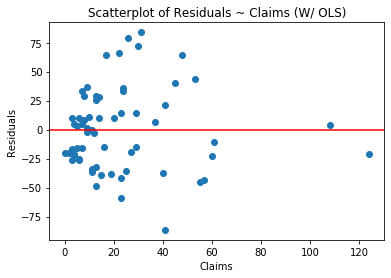

In [40]:
# residual homoskedasticity plot
X = auto_claims['claims']
y = auto_claims['total_payment']
X = add_constant(X)
regression = OLS(y, X).fit()

plt.scatter(X['claims'], regression.resid)
plt.axhline(y = 0, color = 'red', linestyle = '-')
plt.title('Scatterplot of Residuals ~ Claims (W/ OLS)')
plt.xlabel('Claims')
plt.ylabel('Residuals')